# K-Means Clustering Demonstration

This notebook demonstrates how to use the k-means algorithm to cluster data points.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, and scikit-learn.

In [1]:
# Import the required libraries.
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

## Define Helper Functions

Create functions for plotting data, initializing centroids, assigning clusters, and updating centroids.

In [2]:
def plot_data(X: np.ndarray, labels: np.ndarray, centroids: np.ndarray = None,
              show_distance: bool = False):
    """
    Plot the clustered data.

    Args:
        X (np.ndarray): The data points.
        labels (np.ndarray): The cluster labels.
        centroids (np.ndarray, optional): The centroids of the clusters.
            Defaults to `None`.
        show_distance (bool, optional): Whether to show the distance between
            the data points and the centroids. Defaults to `False`.
    """

    # Define the colors to be used in the plot.
    colors = [
        "#2580B7", # Blue
        "#179E86", # Dark Green
        "#9EBE5B", # Light Green
        "#F59B11", # Yellow
        "#C03B26", # Red
        "#633248", # Brown
        "#44546A", # Gray
    ]

    # Show the distance between the data points and the centroids.
    if show_distance and centroids is not None:
        for centroid in centroids:
            for point in X:
                plt.plot(
                    [centroid[0], point[0]], [centroid[1], point[1]],
                    color=colors[-1], alpha=0.2, linestyle="--",
                    linewidth=0.5
                )

    # Plot the clustered data.
    plt.scatter(
        X[:, 0], X[:, 1], c=[colors[int(label)] for label in labels],
        s=50, edgecolor=colors[-1], alpha=0.6
    )

    # Plot the centroids.
    if centroids is not None:
        plt.scatter(
            centroids[:, 0], centroids[:, 1], s=200, c=colors[4], marker="X"
        )

    # Plot information.
    plt.title("K-Means Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()


def initialize_centroids(X: np.ndarray, k: int) -> np.ndarray:
    """
    Initialize the centroids.

    Args:
        X (np.ndarray): The data points.
        k (int): The number of clusters.

    Returns:
        np.ndarray: The initialized centroids.
    """
    indices = np.random.permutation(X.shape[0])
    centroids = X[indices[:k]]
    return centroids


def assign_clusters(X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    """
    Assign the data points to the nearest cluster.

    Args:
        X (np.ndarray): The data points.
        centroids (np.ndarray): The centroids of the clusters.

    Returns:
        np.ndarray: The cluster labels.
    """
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)


def update_centroids(X: np.ndarray, labels: np.ndarray, k: int) -> np.ndarray:
    """
    Update the centroids.

    Args:
        X (np.ndarray): The data points.
        labels (np.ndarray): The cluster labels.
        k (int): The number of clusters.

    Returns:
        np.ndarray: The updated centroids.
    """
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

## K-Means Algorithm Implementation

Implement the complete k-means algorithm with iterative centroid updates.

In [3]:
def k_means(
        X: np.ndarray, k: int, max_iters: int = 100
    ) -> Tuple[np.ndarray, np.ndarray]:
    """
    Apply the k-means algorithm.

    Args:
        X (np.ndarray): The data points.
        k (int): The number of clusters.
        max_iters (int, optional): The maximum number of iterations.
            Defaults to 100.

    Returns:
        Tuple[np.ndarray, np.ndarray]: The centroids and the cluster labels.
    """

    # Initialize the centroids.
    centroids = initialize_centroids(X, k)

    # Apply the k-means algorithm.
    for _ in range(max_iters):

        # Assign the data points to the nearest cluster.
        labels = assign_clusters(X, centroids)

        # Plot the data points and the current centroids.
        plot_data(X, labels + 1, centroids)

        # Update the centroids.
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, labels

## Generate Sample Data

Create synthetic blob data for clustering demonstration.

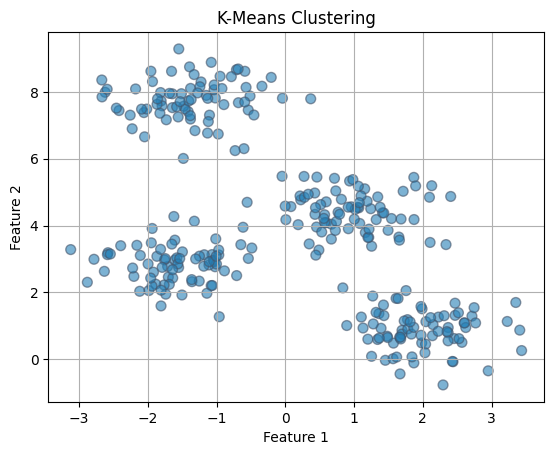

In [4]:
# Set the seed for reproducibility.
np.random.seed(42)

# Generate sample data.
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot the original dataset.
plot_data(X, np.zeros(X.shape[0]))

## Apply K-Means Clustering

Apply the k-means algorithm to cluster the data points.

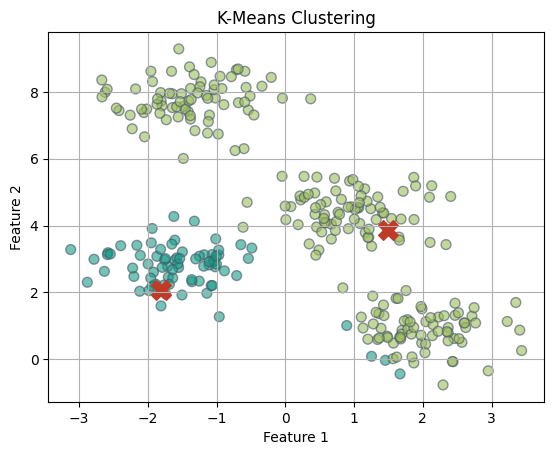

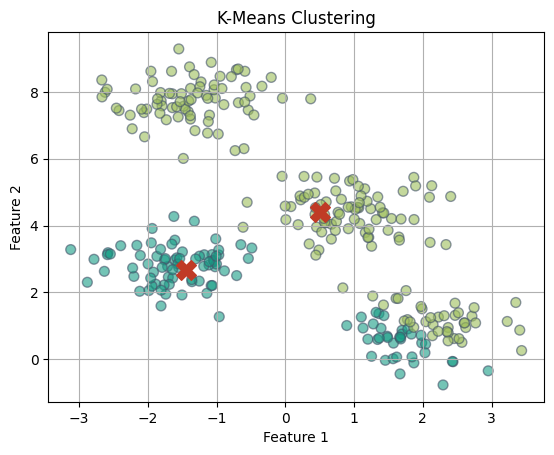

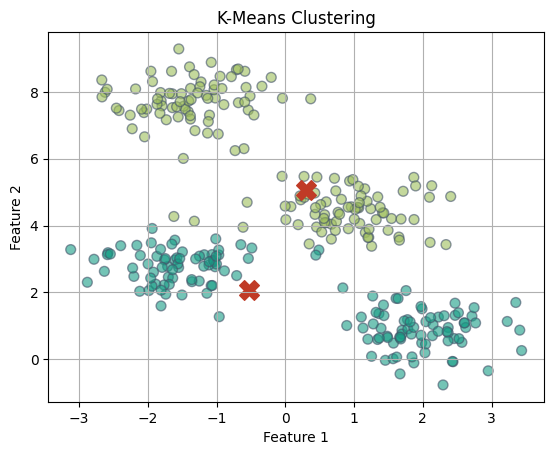

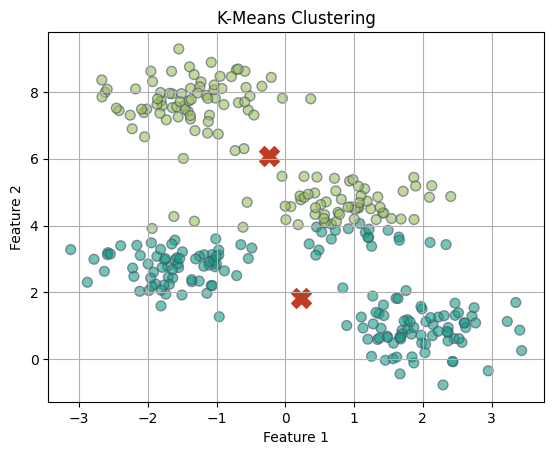

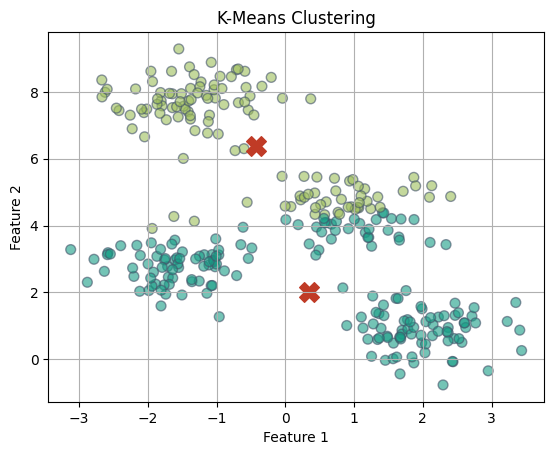

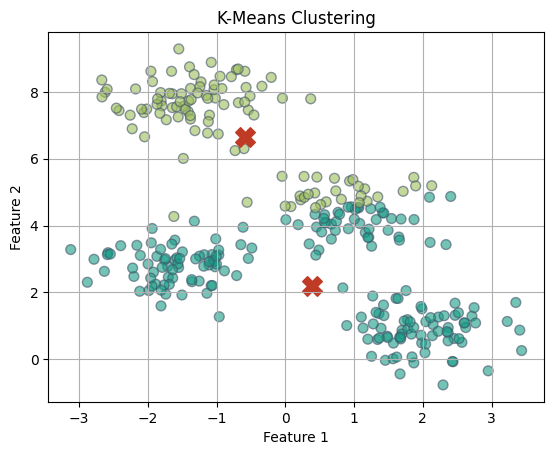

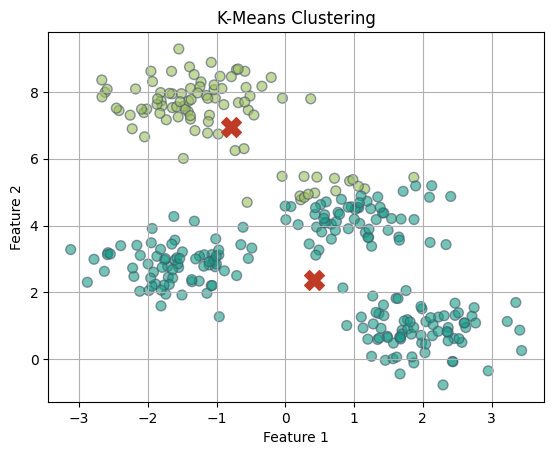

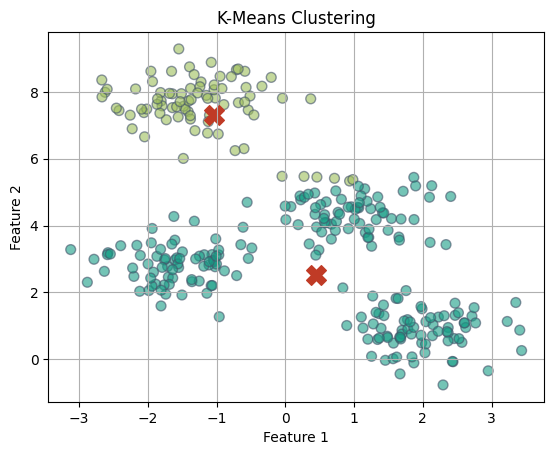

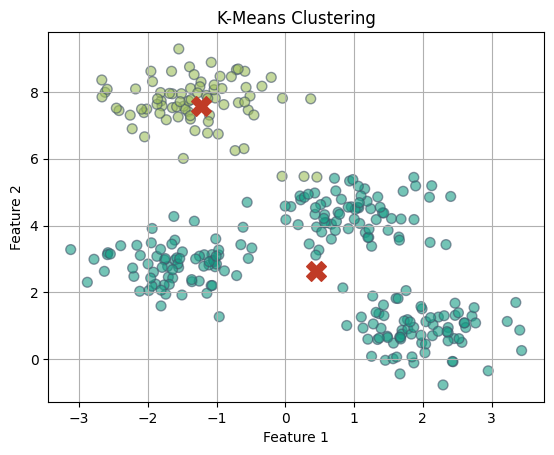

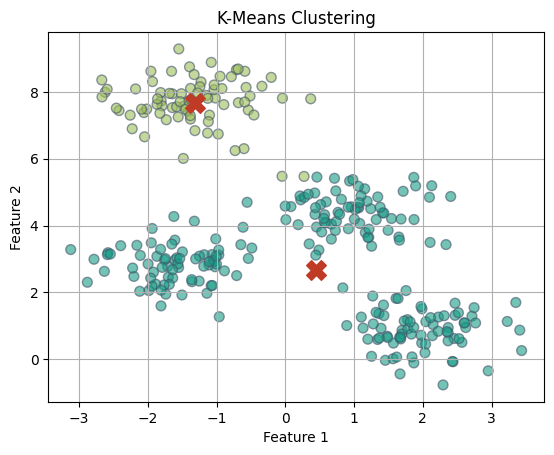

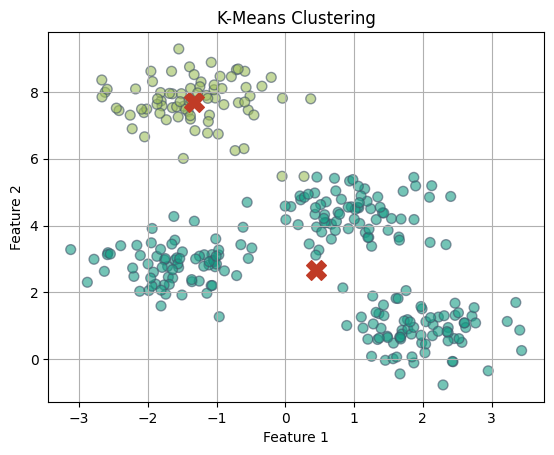

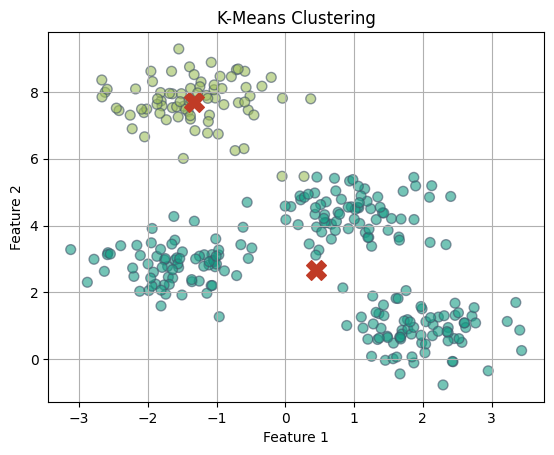

In [5]:
# Apply k-means algorithm.
k = 2
centroids, labels = k_means(X, k)

# Plot the clustered data.
plot_data(X, labels + 1, centroids)